In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import linear_model

In [2]:
fig_size_1 = (15, 5)
fig_size_2 = (8, 4)
fig_size_3 = (6, 6)
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')

start_date = one_year
end_date = today

In [3]:
tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER',
           'XOM', 'BA', 'DAL', 'UAL', 'AAL',
           'XLE', 'XLU', 'IVV', 'VNQ', 'VCSH']

num_shares = {'AMZN': 17, 'AAPL': 208, 'FB': 74, 'GOOGL': 10, 'MSFT': 87, 'UBER': 554,
              'XOM': 361, 'BA': 87, 'DAL': 141, 'UAL': 129, 'AAL': 316,
              'XLE': 431, 'XLU': 56, 'IVV': 64, 'VNQ': 118, 'VCSH': 256, 'CASH': (58927.01+56075.48+23000)}

cost_basis = {'AMZN': 1708.54, 'AAPL': 45.57, 'FB': 168.62, 'GOOGL': 1110.79, 'MSFT': 95.20, 'UBER': 21.65,
              'XOM': 41.51, 'BA': 137.98, 'DAL': 23.61, 'UAL': 25.73, 'AAL': 10.54,
              'XLE': 30.12, 'XLU': 59.49, 'IVV': 267.39, 'VNQ': 76.10, 'VCSH': 78.07, 'CASH': 1}

asset_type = {'AMZN': 'Stock', 'AAPL': 'Stock', 'FB': 'Stock', 'GOOGL': 'Stock', 'MSFT': 'Stock', 'UBER': 'Stock',
              'XOM': 'Stock', 'BA': 'Stock', 'DAL': 'Stock', 'UAL': 'Stock', 'AAL': 'Stock',
              'XLE': 'Sector', 'XLU': 'Sector', 'IVV': 'Index', 'VNQ': 'REIT', 'VCSH': 'Bond', 'CASH': 'Cash'}

In [4]:
df = pd.DataFrame()

for ticker in tickers:
    df_temp = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [ticker] * len(df_temp)
    df_temp['Shares'] = [num_shares[ticker]] * len(df_temp)
    df_temp['Type'] = [asset_type[ticker]] * len(df_temp)
    df_temp['Cost'] = [cost_basis[ticker]] * len(df_temp)
    df = df.append(df_temp)

df = df.append({'Ticker': 'CASH', 'Date' : df['Date'].max() , 'Close' : 1, 'Shares': num_shares['CASH'],
                'Type': asset_type['CASH'], 'Cost': cost_basis['CASH']}, ignore_index=True)

df['Mkt Val'] = df['Shares'] * df['Close']
df['Cost Basis'] = df['Shares'] * df['Cost']
df['Change'] = df['Mkt Val'] - df['Cost Basis']
df['Change %'] = 100*df['Change']/df['Cost Basis']

df_final = df.groupby(['Ticker']).tail(1).set_index('Ticker')
df_final['Mkt Val %'] = 100*df_final['Mkt Val']/df_final['Mkt Val'].sum()
df_final['Cost Basis %'] = 100*df_final['Cost Basis']/df_final['Cost Basis'].sum()
df_final = df_final.round(2)
df_final.sort_values(by='Mkt Val %', ascending=False)

,Date,Close,Shares,Type,Cost,Mkt Val,Cost Basis,Change,Change %,Mkt Val %,Cost Basis %
Ticker,,,,,,,,,,,
CASH,2021-03-19,1.00,138002.49,Cash,1.00,138002.49,138002.49,0.00,0.00,30.29,43.16
AMZN,2021-03-19,3074.96,17.00,Stock,1708.54,52274.32,29045.18,23229.14,79.98,11.47,9.08
UBER,2021-03-19,57.08,554.00,Stock,21.65,31622.32,11994.10,19628.22,163.65,6.94,3.75
IVV,2021-03-19,392.20,64.00,Index,267.39,25100.80,17112.96,7987.84,46.68,5.51,5.35
AAPL,2021-03-19,119.99,208.00,Stock,45.57,24957.92,9478.56,15479.36,163.31,5.48,2.96
BA,2021-03-19,255.82,87.00,Stock,137.98,22256.34,12004.26,10252.08,85.40,4.88,3.75
FB,2021-03-19,290.11,74.00,Stock,168.62,21468.14,12477.88,8990.26,72.05,4.71,3.90
XLE,2021-03-19,49.53,431.00,Sector,30.12,21347.43,12981.72,8365.71,64.44,4.69,4.06
VCSH,2021-03-19,82.33,256.00,Bond,78.07,21076.48,19985.92,1090.56,5.46,4.63,6.25


<AxesSubplot:title={'center':'Change'}, xlabel='Ticker'>

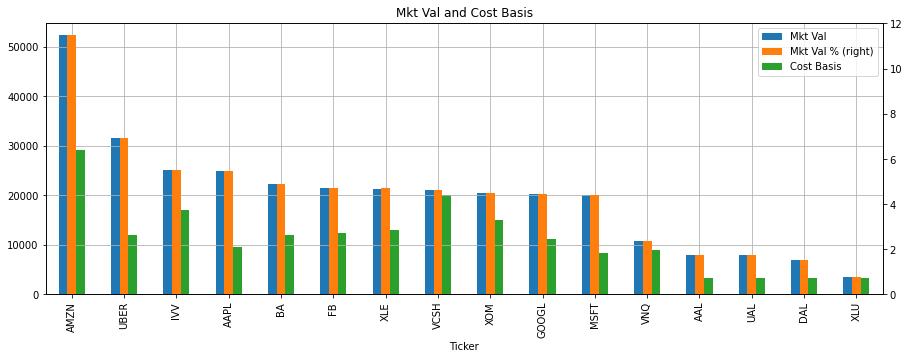

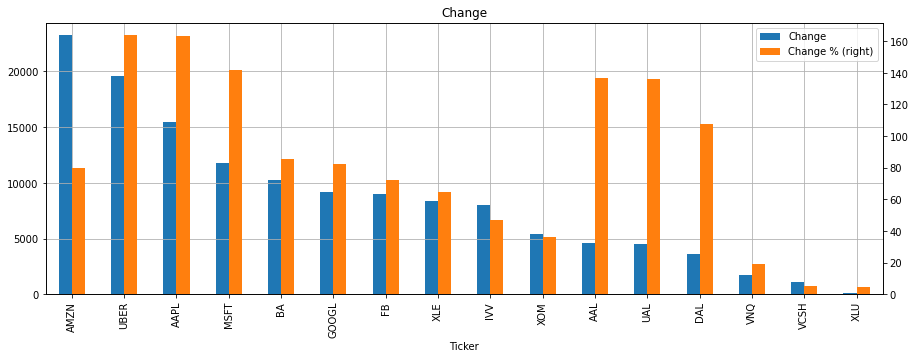

In [5]:
df_final[df_final['Cost'] != 1].sort_values(by='Mkt Val', ascending=False).plot(
    y=['Mkt Val', 'Mkt Val %', 'Cost Basis'], secondary_y=['Mkt Val %'],
    kind='bar', figsize=fig_size_1, grid=True,
    title='Mkt Val and Cost Basis')
df_final[df_final['Cost'] != 1].sort_values(by='Change', ascending=False).plot(
    y=['Change', 'Change %'], secondary_y='Change %',
    kind='bar', figsize=fig_size_1, grid=True,
    title='Change')

In [6]:
df_final_type = df_final.groupby('Type').sum()[['Mkt Val', 'Cost Basis']]
df_final_type['Mkt Val %'] = 100*df_final_type['Mkt Val']/df_final_type['Mkt Val'].sum()
df_final_type['Cost Basis %'] = 100*df_final_type['Cost Basis']/df_final_type['Cost Basis'].sum()
df_final_type['Change'] = df_final_type['Mkt Val'] - df_final_type['Cost Basis']
df_final_type['Change %'] = 100 * df_final_type['Change'] / df_final_type['Cost Basis']
df_final_type = df_final_type.round(2)
df_final_type

,Mkt Val,Cost Basis,Mkt Val %,Cost Basis %,Change,Change %
Type,,,,,,
Bond,21076.48,19985.92,4.63,6.25,1090.56,5.46
Cash,138002.49,138002.49,30.29,43.16,0.00,0.00
Index,25100.80,17112.96,5.51,5.35,7987.84,46.68
REIT,10677.82,8979.80,2.34,2.81,1698.02,18.91
Sector,24830.63,16313.16,5.45,5.10,8517.47,52.21
Stock,235920.83,119354.21,51.78,37.33,116566.62,97.66


<AxesSubplot:title={'center':'Change'}, xlabel='Type'>

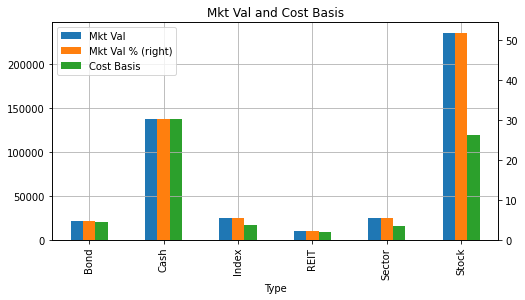

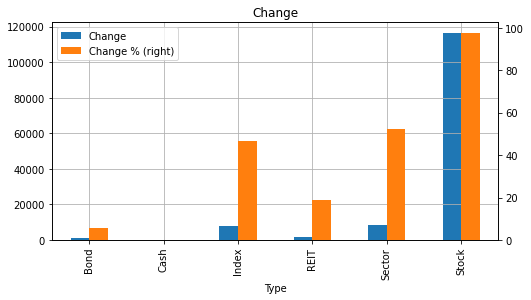

In [7]:
df_final_type.plot(y=['Mkt Val', 'Mkt Val %', 'Cost Basis'], secondary_y=['Mkt Val %'],
                   kind='bar', figsize=fig_size_2, grid=True,
                   title='Mkt Val and Cost Basis')
df_final_type.plot(y=['Change', 'Change %'], secondary_y=['Change %'],
                   kind='bar', figsize=fig_size_2, grid=True,
                   title='Change')

In [8]:
print('Portfolio value:', round(df_final_type['Mkt Val'].sum(), 2))
print('Cost basis:', df_final_type['Cost Basis'].sum())
print('Change:', round(df_final_type['Change'].sum(), 2))
print('Change %:', round(100*df_final_type['Change'].sum()/df_final_type['Mkt Val'].sum(), 2))

Portfolio value: 455609.05
Cost basis: 319748.54
Change: 135860.51
Change %: 29.82


Chg Portfolio: 5.92
Chg IVV: 6.21
Std dev portfolio 0.847
Std dev IVV 0.965
Beta: 0.962


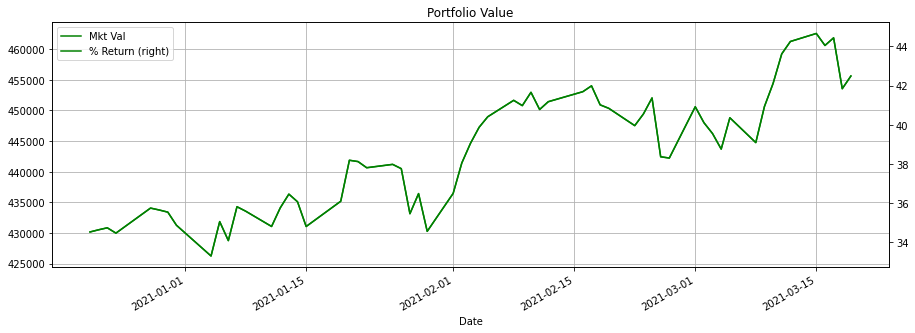

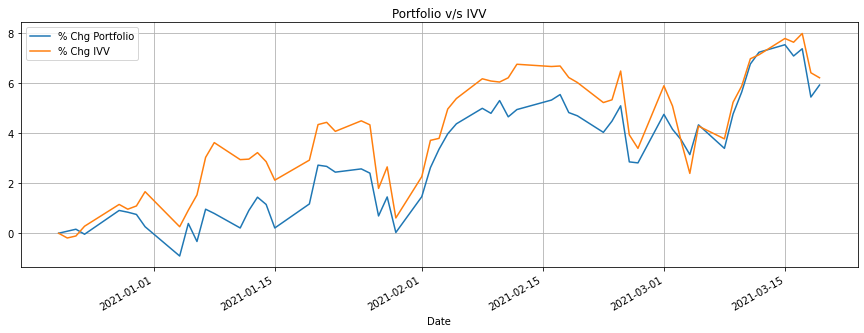

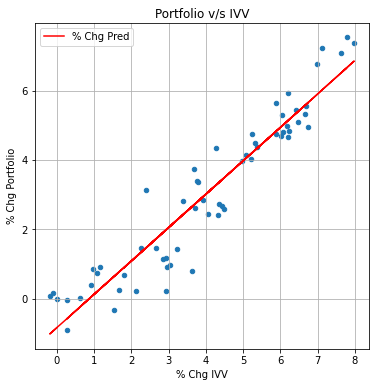

In [9]:
mkt_val = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Mkt Val']) + df[df['Ticker'] == 'CASH'][['Mkt Val']].values[0]
mkt_val = mkt_val.reset_index()

cost_basis = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Cost Basis']) + df[df['Ticker'] == 'CASH'][['Cost Basis']].values[0]
cost_basis = cost_basis.reset_index()

period = three_months

dff = mkt_val[(mkt_val['Date'] >= period) & (mkt_val['Date'] <= end_date)].set_index('Date')
dff['Cost Basis'] = cost_basis[(cost_basis['Date'] >= period) & (cost_basis['Date'] <= end_date)].set_index('Date')['Cost Basis']

dff['Return'] = dff['Mkt Val'] - dff['Cost Basis']
dff['% Return'] = 100*(dff['Mkt Val'] - dff['Cost Basis'])/dff['Cost Basis']
dff['% Chg Portfolio'] = 100*(dff['Mkt Val']-dff.head(1)['Mkt Val'].values[0])/dff.head(1)['Mkt Val'].values[0]
dff['Close IVV'] = df[(df['Ticker'] == 'IVV') & (df['Date'] >= period) & (df['Date'] <= end_date)][['Date', 'Close']].set_index('Date')
dff['% Chg IVV'] = 100*(dff['Close IVV']-dff.head(1)['Close IVV'].values[0])/dff.head(1)['Close IVV'].values[0]

model = linear_model.LinearRegression()
model.fit(np.array(dff[['% Chg IVV']]), np.array(dff[['% Chg Portfolio']]))

dff['% Chg Pred'] = model.predict(np.array(dff[['% Chg IVV']]))
dff = dff.round(2)

dff.plot(y=['Mkt Val', '% Return'], secondary_y='% Return', color=['green', 'green'],
         figsize=fig_size_1, grid=True, title='Portfolio Value')

dff.plot(y=['% Chg Portfolio', '% Chg IVV'], figsize=fig_size_1, grid=True, title='Portfolio v/s IVV')

fig, axes = plt.subplots(sharex=True)
dff.plot(x='% Chg IVV', y='% Chg Portfolio', kind='scatter',
         ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')
dff.plot(x='% Chg IVV', y='% Chg Pred', kind='line', color='Red',
         ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')

print('Chg Portfolio:', dff.tail(1)['% Chg Portfolio'].values[0])
print('Chg IVV:', dff.tail(1)['% Chg IVV'].values[0])

print('Std dev portfolio', round(100*dff.pct_change().std()['Mkt Val'], 3))
print('Std dev IVV', round(100*dff.pct_change().std()['Close IVV'], 3))

print('Beta:', round(model.coef_[0][0], 3))